<a href="https://colab.research.google.com/github/yeonhole/Scrapping-Billboard-song-info/blob/master/Arystan_ESP_failure_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ESP_failure prediction
***


In [20]:
# CSV 파일 생성 및 저장

from google.colab import files
#test.to_csv('test.csv', encoding='utf-8-sig',index=False, header=True)
#files.download('test.csv')

In [ ]:
#from google.colab import files
#myfile = files.upload()

Saving Arystan_ESP.csv to Arystan_ESP.csv


In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings('ignore')

In [51]:
data = pd.read_csv('Arystan_ESP.csv')
data.head(3)

,Well#,ESP_Count,Type,Condition,Depth,Supplier,Status,Cost,Ops_days
0,50,1,45.0,new,NaN,ANSK,production decline,"87,137",602
1,50,2,30.0,new,NaN,ANSK,production decline,"132,450",238
2,50,3,25.0,new,NaN,ANSK,pump stuck,"109,890",95


In [49]:
data4 = data[['Well#', 'ESP_Count', 'Type', 'Condition', 'Supplier', 'Ops_days']].dropna() 
data4.head(3)

,Well#,ESP_Count,Type,Condition,Supplier,Ops_days
0,50,1,45.0,new,ANSK,602
1,50,2,30.0,new,ANSK,238
2,50,3,25.0,new,ANSK,95


In [52]:
print(data4.shape)
print(data.shape)

(590, 6)
(591, 9)


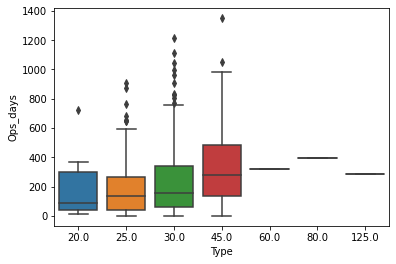

In [53]:
sns.boxplot(x='Type', y='Ops_days', data = data)

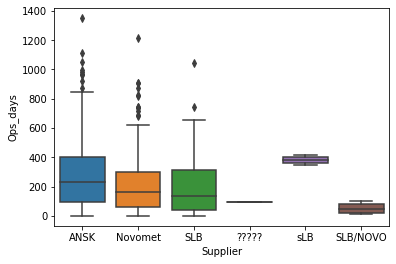

In [54]:
sns.boxplot(x='Supplier', y='Ops_days', data = data)

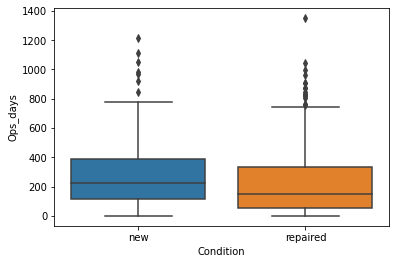

In [55]:
sns.boxplot(x='Condition', y='Ops_days', data = data)

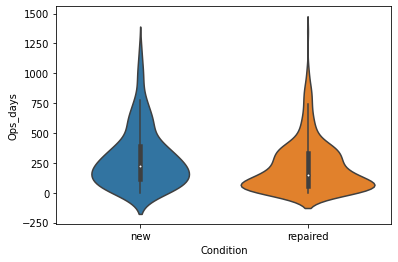

In [56]:
sns.violinplot(x= 'Condition', y='Ops_days', data = data)

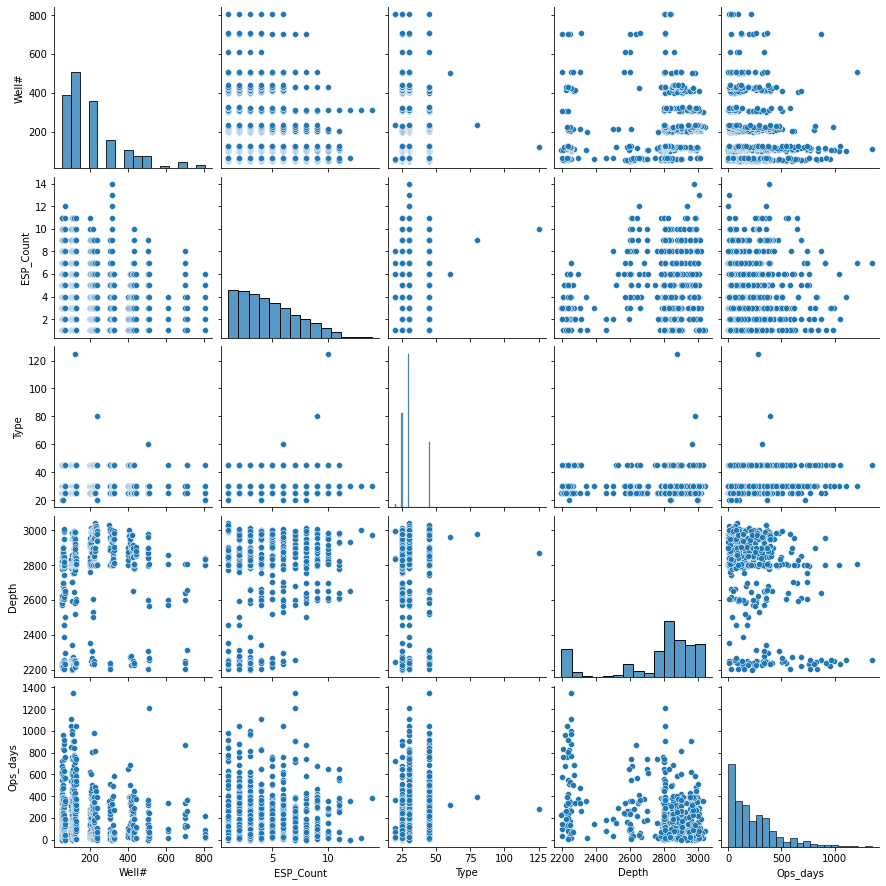

In [57]:
sns.pairplot(data=data)

In [23]:
train, test = train_test_split(data, test_size=0.2, random_state = 100)
print(len(train), "train +", len(test), "test")
print('Total',len(data))

472 train + 119 test
Total 591


In [26]:
test.to_csv('train.csv', encoding='utf-8-sig',index=False, header=True)
test.to_csv('test.csv', encoding='utf-8-sig',index=False, header=True)
files.download('train.csv')
files.download('test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
train.head(3)

,Well#,ESP_Count,Type,Condition,Depth,Supplier,Status,Cost,Ops_days
563,509,2,30.0,repaired,NaN,ANSK,Pump stuck,"47,244",120
554,506,2,30.0,repaired,2202.00,ANSK,R-0,"41,127",145
491,401,1,25.0,new,2803.63,Novomet,no production,"62,318",30


In [31]:
test.head(3)

,Well#,ESP_Count,Type,Condition,Depth,Supplier,Status,Cost,Ops_days
391,220,2,30.0,repaired,2847.0,Novomet,ESP stuck,NaN,106
450,306,4,45.0,new,2900.0,Novomet,No flow,"64,447",295
140,101,5,25.0,repaired,2802.0,Novomet,No flow,"38,987",42


## feature 별 운영시간 평균값으로 랭크 인코딩

In [35]:
train.groupby('Well#').Ops_days.mean().sort_values() # 적용하기 어려움

Well#
304      7.000000
119     24.000000
207     31.500000
200     34.000000
65      35.250000
          ...    
111    493.166667
125    544.750000
104    575.200000
61     642.400000
63     740.000000
Name: Ops_days, Length: 89, dtype: float64

In [36]:
train.groupby('ESP_Count').Ops_days.mean().sort_values()  #개연성 낮음

ESP_Count
13     10.000000
10    211.533333
8     215.937500
9     226.923077
1     235.188406
3     236.784615
4     239.775862
5     240.214286
2     254.179104
6     255.400000
7     293.138889
11    351.444444
12    355.000000
14    385.000000
Name: Ops_days, dtype: float64

In [37]:
train.groupby('Type').Ops_days.mean().sort_values() #개연성 낮음

Type
25.0     185.861314
20.0     216.500000
30.0     236.512931
125.0    283.000000
60.0     318.000000
45.0     354.505376
80.0     392.000000
Name: Ops_days, dtype: float64

In [38]:
train.groupby('Condition').Ops_days.mean().sort_values() #개연성 낮음

Condition
repaired    222.424779
new         304.225564
Name: Ops_days, dtype: float64

In [39]:
train.groupby('Supplier').Ops_days.mean().sort_values() 

Supplier
SLB/NOVO     52.750000
?????        94.000000
SLB         191.200000
Novomet     223.044444
ANSK        313.351515
sLB         382.000000
Name: Ops_days, dtype: float64

In [64]:
#제조사별 운영시간 랭크 인코딩

train['Supplier_rank'] = train.Supplier.map({'sLB' : 1, 'ANSK' : 2, 'Novomet' : 3, 'SLB' : 4, '?????' : 5, 'SLB/NOVO' : 6})
test['Supplier_rank'] = test.Supplier.map({'sLB' : 1, 'ANSK' : 2, 'Novomet' : 3, 'SLB' : 4, '?????' : 5, 'SLB/NOVO' : 6})
train.head()

,Well#,ESP_Count,Type,Condition,Depth,Supplier,Status,Cost,Ops_days,Supplier_rank
563,509,2,30.0,repaired,NaN,ANSK,Pump stuck,"47,244",120,2
554,506,2,30.0,repaired,2202.00,ANSK,R-0,"41,127",145,2
491,401,1,25.0,new,2803.63,Novomet,no production,"62,318",30,3
425,228,3,45.0,repaired,2898.00,Novomet,Running,NaN,818,3
29,53,3,30.0,repaired,2214.00,ANSK,Movied to A-432,0,242,2


In [66]:
train.groupby('Status').Ops_days.mean().sort_values() #카테고리 그룹핑 필요  RO, no flow, tubing leak, pump stuck

Status
Cable damaged                    0.000000
R-0 (fall down)                  0.000000
POOH for Replacement             0.000000
Movied to A-122                 17.000000
Movied to A-305                 21.000000
underload                       32.500000
Convert to injection            36.000000
POOH for repaire                59.000000
failed in the hole              70.125000
Movied to A-115                 81.000000
no flow                         86.000000
Stop testing                   103.000000
no production, R-0             114.750000
tubing leak                    126.000000
watercut 100%                  146.000000
Intervention                   147.073171
No flow                        147.142857
POOH                           170.250000
Pump stuck                     175.050000
Production decline             177.000000
ESP stuck                      190.611111
ESP Stuck                      192.000000
POOH for Frac                  199.000000
ESP stuck, R-0             

[## 장르별 영화 관객수 평균값으로 랭크 인코딩](https://)

In [67]:
tr_nm_rank = train.groupby('Well#').Ops_days.median().reset_index(name = 'num_rank').sort_values(by = 'num_rank')
tr_nm_rank

,Well#,num_rank
63,304,7.0
81,440,17.0
14,65,22.0
31,119,24.0
39,200,29.0
...,...,...
38,126,539.0
37,125,562.0
19,104,618.0
10,61,738.0


In [68]:
tr_nm_rank['num_rank'] = [i + 1 for i in range(tr_nm_rank.shape[0])]
tr_nm_rank

,Well#,num_rank
63,304,1
81,440,2
14,65,3
31,119,4
39,200,5
...,...,...
38,126,85
37,125,86
19,104,87
10,61,88


#### 최종 데이터 병합

In [69]:
train = pd.merge(train, tr_nm_rank, how = 'left')

In [70]:
test = pd.merge(test, tr_nm_rank, how = 'left')

In [71]:
test.fillna(0, inplace = True)

In [79]:
train.head(3) 


,Well#,ESP_Count,Type,Condition,Depth,Supplier,Status,Cost,Ops_days,Supplier_rank,num_rank
0,509,2,30.0,repaired,NaN,ANSK,Pump stuck,"47,244",120,2,22
1,506,2,30.0,repaired,2202.00,ANSK,R-0,"41,127",145,2,33
2,401,1,25.0,new,2803.63,Novomet,no production,"62,318",30,3,12


In [80]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
#from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
#from ngboost import NGBRegressor

#### 모델링 데이터 구성
- 타겟 값인 관객수를 로그변환
- 상영등급은 더미 변수
- 출연 배우 수는 로그변환

In [91]:
X = train[['num_rank', 'ESP_Count', 'Type', 'Condition', 'Depth', 'Supplier_rank','Cost']]
y = train.Ops_days

In [92]:
X = pd.get_dummies(columns = ['Type'], data = X)

In [93]:
target = test[['num_rank', 'ESP_Count', 'Type', 'Condition', 'Depth', 'Supplier_rank','Cost']]

In [94]:
target = pd.get_dummies(columns = ['Type'], data = target)

#### 10Fold로 교차검증

In [95]:
kf = KFold(n_splits =  10, shuffle = True, random_state = 42)

In [96]:
kf

KFold(n_splits=10, random_state=42, shuffle=True)

### 5가지 모델 사용
#### 1) GradientBoostingRegressor

In [97]:
gbm = GradientBoostingRegressor(random_state = 42)

In [102]:
rmse_list = []
gb_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X, y) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]

    gbm.fit(tr_x, tr_y)
    
    pred = np.expm1([0 if x < 0 else x for x in gbm.predict(val_x)])
    sub_pred = np.expm1([0 if x < 0 else x for x in gbm.predict(target)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    gb_pred += (sub_pred / 10)
    
   

ValueError: ignored

ValueError: ignored

In [ ]:
np.mean(rmse_list)

1174378.9787164854

#### 2) NGBRegressor

In [ ]:
#ngb = NGBRegressor(random_state = 518)

In [ ]:
#rmse_list = []
#ngb_pred = np.zeros((test.shape[0]))
#for tr_idx, val_idx in kf.split(X, y) :
#    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
#    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
#    
#    ngb.fit(tr_x, tr_y)
#    
#    pred = np.expm1([0 if x < 0 else x for x in ngb.predict(val_x)])
#    sub_pred = np.expm1([0 if x < 0 else x for x in ngb.predict(target)])
#    rmse = np.sqrt(mean_squared_error(val_y, pred))
#    
#    rmse_list.append(rmse)
#    
#    ngb_pred += (sub_pred / 10)

In [ ]:
#np.mean(rmse_list)

#### 3) LGBMRegressor

In [103]:
lgbm = LGBMRegressor(random_state = 518)

In [104]:
rmse_list = []
lgb_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X, y) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    lgbm.fit(tr_x, tr_y)
    
    pred = np.expm1([0 if x < 0 else x for x in lgbm.predict(val_x)])
    sub_pred = np.expm1([0 if x < 0 else x for x in lgbm.predict(target)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    lgb_pred += (sub_pred / 10)

ValueError: ignored

In [ ]:
np.mean(rmse_list)

1213815.0440528719

#### 4) XGBRegressor

In [105]:
xgb = XGBRegressor(random_state = 518)

In [106]:
rmse_list = []
xgb_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X, y) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    xgb.fit(tr_x, tr_y)
    
    pred = np.expm1([0 if x < 0 else x for x in xgb.predict(val_x)])
    sub_pred = np.expm1([0 if x < 0 else x for x in xgb.predict(target)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    xgb_pred += (sub_pred / 10)

ValueError: ignored

In [ ]:
np.mean(rmse_list)

1002219.3081045212

#### 5) CatBoostRegressor

In [ ]:
#cat = CatBoostRegressor(random_state = 518, silent = True)

In [ ]:
#rmse_list = []
#cat_pred = np.zeros((test.shape[0]))
#for tr_idx, val_idx in kf.split(X, y) :
#    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
#    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
#    
#    cat.fit(tr_x, tr_y)
#    
#    pred = np.expm1([0 if x < 0 else x for x in cat.predict(val_x)])
#    sub_pred = np.expm1([0 if x < 0 else x for x in cat.predict(target)])
#   rmse = np.sqrt(mean_squared_error(val_y, pred))
#    
#    rmse_list.append(rmse)
#    
#    cat_pred += (sub_pred / 10)

In [ ]:
#np.mean(rmse_list)

#### 6) RandomForestRegressor

In [107]:
rf = RandomForestRegressor(random_state = 518)

In [108]:
rmse_list = []
rf_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X, y) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    rf.fit(tr_x, tr_y)
    
    pred = np.expm1([0 if x < 0 else x for x in rf.predict(val_x)])
    sub_pred = np.expm1([0 if x < 0 else x for x in rf.predict(target)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    rf_pred += (sub_pred / 10)

ValueError: ignored

In [ ]:
np.mean(rmse_list)

873671.7029559091

***

#### 최종 예측 결과 블렌딩

In [109]:
#submission['Ops_days'] = (xgb_pred + cat_pred + lgb_pred + rf_pred + gb_pred + ngb_pred) / 6
submission['Ops_days'] = (xgb_pred  + lgb_pred + rf_pred + gb_pred ) / 4

NameError: ignored

In [110]:
submission.sort_values(by = 'Ops_days')

NameError: ignored

In [ ]:
submission.to_csv("r.csv", index = False)